## Introduction for the project
This Dataset contains information of the California housing Prices
The objective of the analysis is to predict median house prices in different regions in California

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data from Excel File

In [3]:
#Import Data from Excel file
df_housing=pd.read_excel(r'C:\Users\armaity\Desktop\Support Tools\power bi\Dataset.xlsx') 
#r is used to convert the data into raw data as  not to throw the unicode error
df_housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


#### Understanding the Data

In [3]:
#to undestand whether the data is continous or categorical

df_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
#Read headers
#print(df_housing.columns)


#Read each columns or multiple columns
#print(df_housing['households'])
#print(df_housing[['latitude','longitude','population','households']])

#Read each row or multiple rows
#print(df_housing.iloc[1:4])

#Read a specific Location (R,C)
#print(df_housing.iloc[2,2])

#using loc function to get data according to our need
df_housing.loc[df_housing['median_house_value']> 269700,:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20506,-118.73,34.29,8,4983,754.0,2510,725,6.9454,276500,<1H OCEAN
20527,-121.79,38.54,7,1777,513.0,4479,504,1.4653,310000,INLAND
20531,-121.81,38.58,17,1964,314.0,808,286,5.9629,286000,INLAND
20533,-121.67,38.54,13,6141,1019.0,2553,967,4.2432,326500,INLAND


### What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

In [5]:
# Describing the important features of the data
info = df_housing.describe()
info.loc['median'] = df_housing.median(numeric_only=True)

info

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
median,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000


#### Distribution of Data using Appropriate Plots

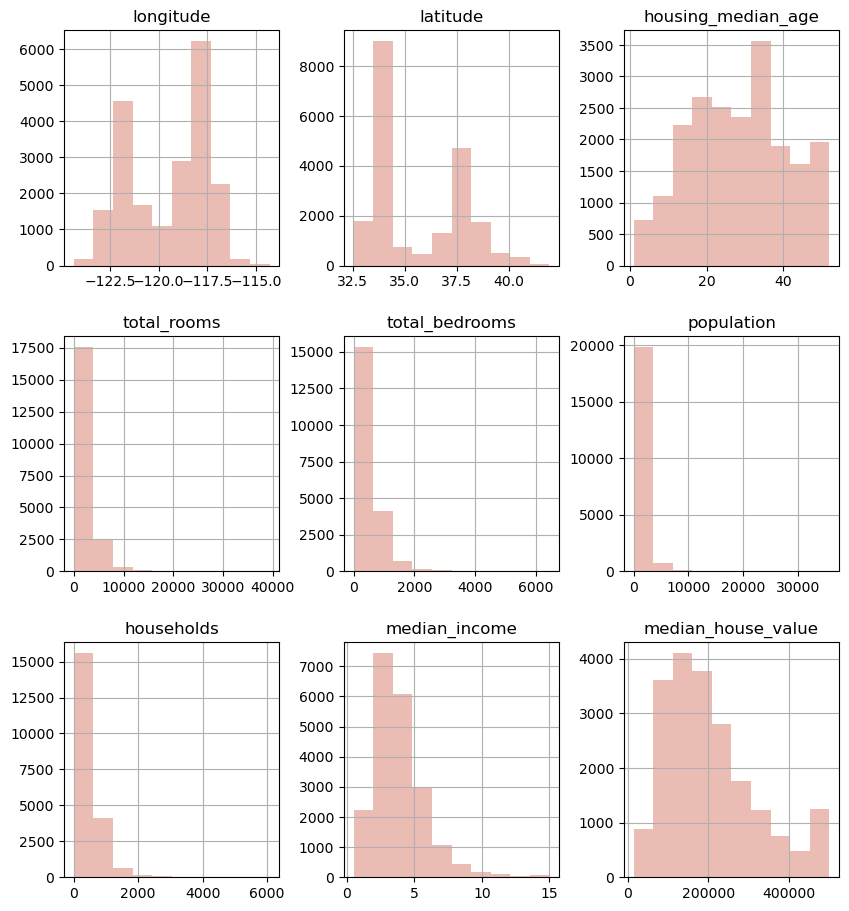

In [6]:
#Histogram Plot
df_housing.hist(bins=10,figsize = (10,11),color='#bd2309',alpha=0.3)
plt.show()

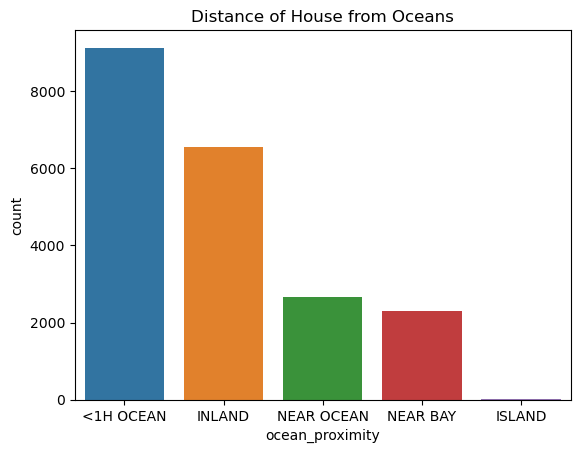

In [7]:
#count Plot 
# It is used to view across a categorical data
# df_housing.ocean_proximity.value_counts().index
sns.countplot(x=df_housing['ocean_proximity'] , data = df_housing ,order = df_housing.ocean_proximity.value_counts().index)
#[::-1])to reverse the data in ascending
plt.title('Distance of House from Oceans')
plt.show()
#Its gives us a knowledge about where most of the houses are situated and how far they are from ocean

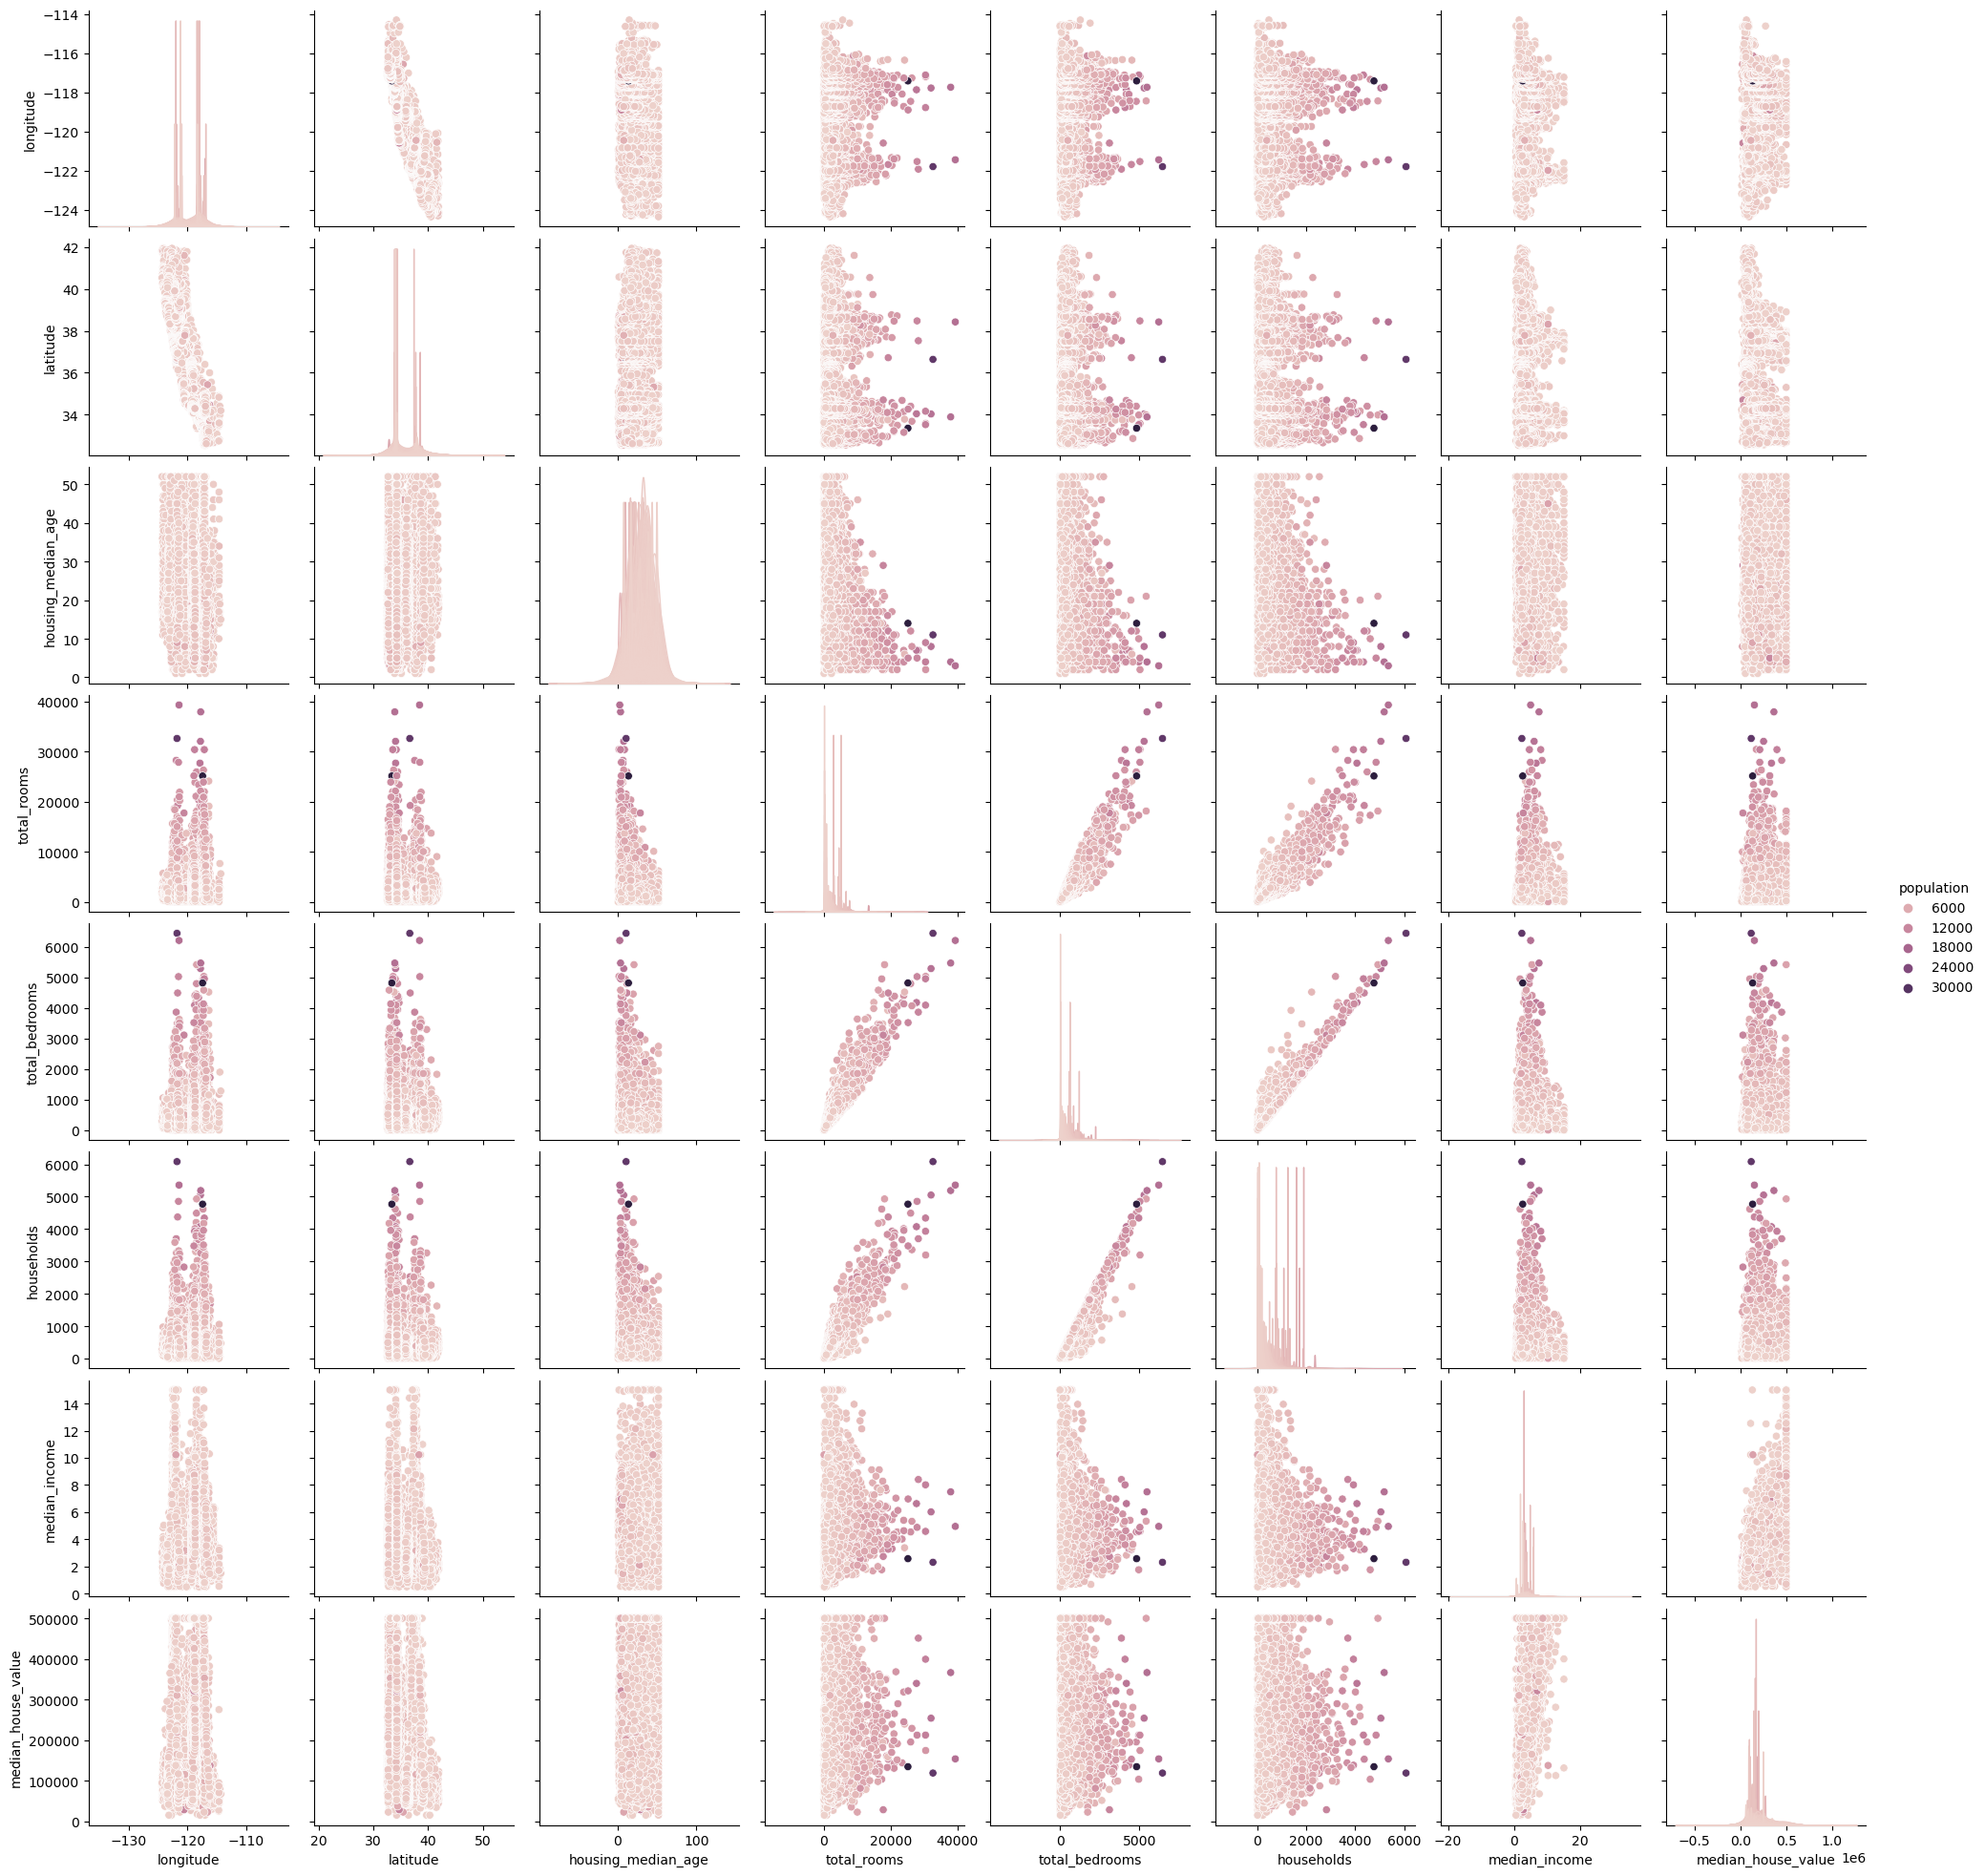

In [8]:
sns.pairplot(df_housing,hue = 'population' )
#this plot compares the data as a whole and lets us know how each of the column interacts with the other one
#df = seaborn.load_dataset('tips')
# pairplot with hue sex
# seaborn.pairplot(df, hue ='sex')
# # to show
# plt.show()

###  Q2 Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

Text(0, 0.5, 'Population')

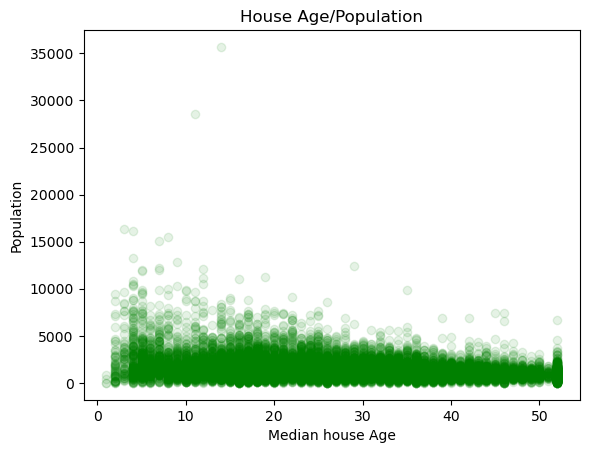

In [9]:
#scatter plot
plt.scatter(df_housing["housing_median_age"],df_housing["population"], alpha=0.1,color="g")
plt.title('House Age/Population')
plt.xlabel('Median house Age')
plt.ylabel('Population')
#As we can observe from this plot more the median age of the house less the population since order the house more is the cost
#hence less affordable

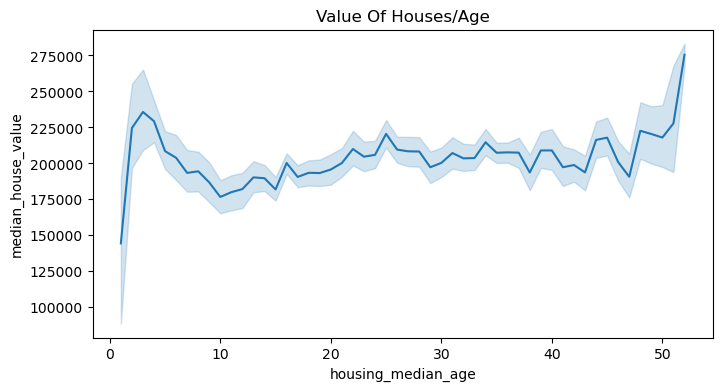

In [10]:
#Line Plot
plt.figure(figsize=(8,4))
sns.lineplot( x = "housing_median_age",y = "median_house_value",data = df_housing);
plt.title('Value Of Houses/Age')

plt.show()
#If we compare it with value the median house value then the price remains practically constant unless and untill its vintage

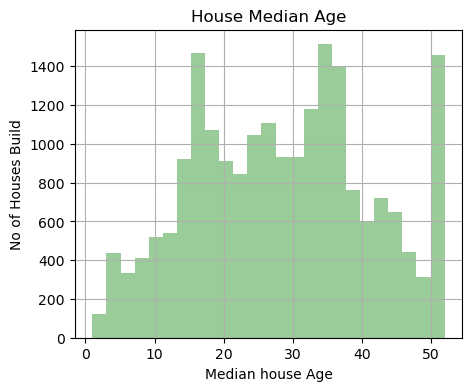

In [11]:
#Histogram Plot
df_housing["housing_median_age"].hist(bins=25,figsize = (5,4),color="green",alpha=0.4)
plt.title('House Median Age')
plt.xlabel('Median house Age')
plt.ylabel('No of Houses Build')
plt.show()
#this plot shows us that there are not much new houses build as the average houses are around 30-50 years old

###  Q3 Show with the help of visualization, how median_income and median_house_values are related?

In [12]:
# Checking correlations 

corr_matrix = df_housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
## The biggest correlation is between median_house_value and median_income

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

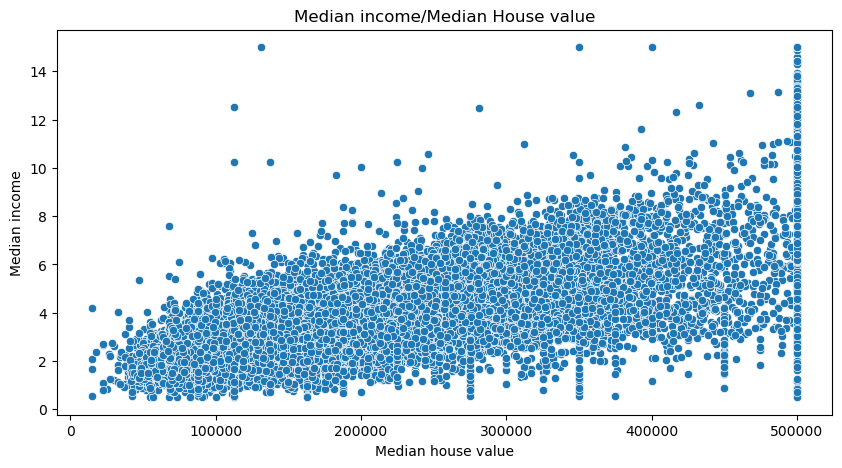

In [13]:
plt.figure(figsize=(10,5))

# use the function regplot to make a scatterplot
sns.scatterplot(x= "median_house_value", y= "median_income", data = df_housing)
plt.title('Median income/Median House value')
plt.xlabel('Median house value')
plt.ylabel('Median income')
  
# To show the plot
plt.show()
#As we can see that as the median_income is increasing, the median house value is also increasing.
#It makes perfect sense also

<AxesSubplot:title={'center':'House Value/Income'}, xlabel='median_house_value', ylabel='median_income'>

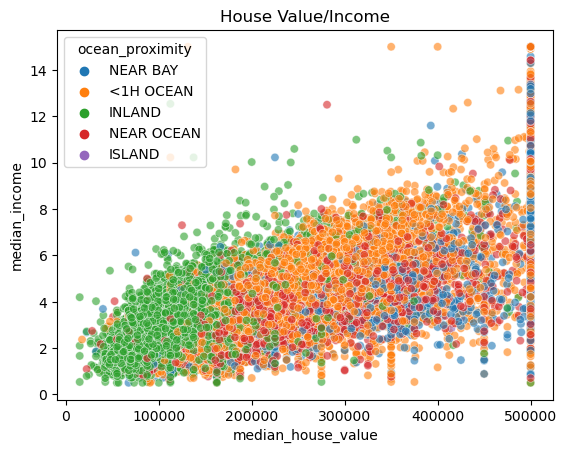

In [14]:

# sns.lineplot( x = df_housing['median_house_value']/10000,
#              y = "median_income",
#              data = df_housing);
plt.title('House Value/Income')
# sns.regplot(x="median_house_value", y="median_income", data = df_housing)
sns.scatterplot(x = "median_house_value", y = "median_income", hue = "ocean_proximity", alpha=.6, data = df_housing)

### Q4 Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [15]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [16]:
# check for null values
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
#drop the rows containing null values
dataframe_without_nullvalues = df_housing.dropna()
#New Data Set
dataframe_without_nullvalues

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


### Q5 Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [18]:
#df_housing.describe()
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [19]:
new_df_housing = df_housing.copy()
mean_value = new_df_housing['total_bedrooms'].mean()
mean_value
#new_df_housing.fillna(value=mean_value, inplace=True)
#new_df_housing = new_df_housing['total_bedrooms'].fillna(value=mean_value , inplace = True)


537.8705525375618

In [20]:
new_df_housing['total_bedrooms'].fillna(value=mean_value , inplace = True)

In [21]:
new_df_housing.info()
new_df_housing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


### Q6 Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [22]:
def func_median(n_num):
    
    
    #n_num = [1, 2, 3, 4, 5]
    n = len(n_num)
    
    n_num.sort() 
    if n % 2 == 0:
        median1 = n_num[n//2]
        median2 = n_num[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = n_num[n//2]
    print("Median is: " + str(median))
    

In [23]:
info1 = df_housing.describe()
info1.loc['median'] = df_housing.median(numeric_only=True)

info1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
median,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000


In [24]:
#func_median([10.0,20.0,30.5,40.0])
# Using Series.values.tolist() to convert data frame series column to list
col_list = df_housing['median_house_value'].values.tolist()
#print(col_list)
func_median(col_list)


Median is: 179700.0


### Q7 Plot latitude versus longitude and explain your observations.

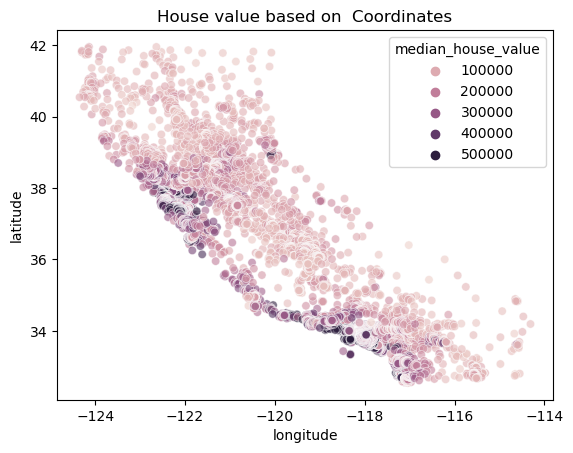

In [25]:
# use the function regplot to make a scatterplot
sns.scatterplot(x = "longitude", y = "latitude", hue = "median_house_value", alpha=.6, data = df_housing)
plt.title('House value based on  Coordinates')
  
# To show the plot
plt.show()
#This graph shows us the population distribution across the state of california and which regions have more median house value
#similarly we can check for other columns as well to know more about our data

Text(0.5, 1.0, 'Population Distribution and House value based on  Coordinates')

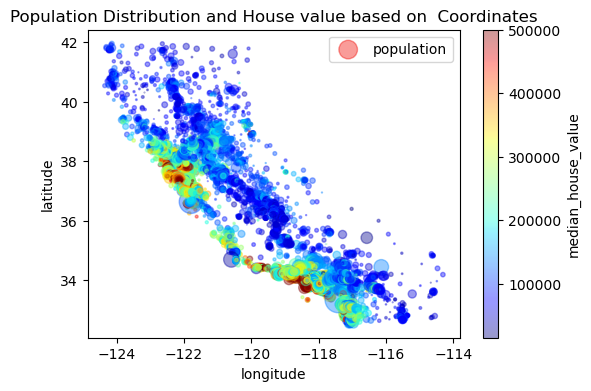

In [26]:
df_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                s=df_housing['population']/100, label='population', figsize=(6,4),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.title('Population Distribution and House value based on  Coordinates')

### Q8 Create a data set for which the ocean_proximity is ‘Near ocean’.

In [27]:
df_housing_nearocean = df_housing.copy()
df_housing_nearocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [29]:
df_newfiltered_data = df_housing_nearocean.loc[df_housing_nearocean['ocean_proximity'] == 'NEAR OCEAN']
df_newfiltered_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN


### Q9 Find the mean and median of the median income for the data set created in question 8

In [30]:
mean = df_newfiltered_data['median_income'].mean()
median = df_newfiltered_data['median_income'].median()
#median
mean
#df_newfiltered_data.describe()

4.005784800601957

In [33]:
df_newfiltered_data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2658.000000,2658.000000,2658.000000,2658.000000,2628.000000,2658.000000,2658.000000,2658.000000,2658.000000
mean,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427
std,2.327307,2.275386,11.840371,1990.724760,376.320045,1005.563166,344.445256,2.010558,122477.145927
min,-124.350000,32.540000,2.000000,15.000000,3.000000,8.000000,3.000000,0.536000,22500.000000
25%,-122.020000,32.780000,20.000000,1505.000000,313.000000,778.500000,299.000000,2.630525,150000.000000
50%,-118.260000,33.790000,29.000000,2195.000000,464.000000,1136.500000,429.000000,3.647050,229450.000000
75%,-117.182500,36.980000,37.000000,3109.000000,666.000000,1628.000000,614.000000,4.837400,322750.000000
max,-116.970000,41.950000,52.000000,30405.000000,4585.000000,12873.000000,4176.000000,15.000100,500001.000000


### Q10 Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [31]:
dataset = df_housing.copy()
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [32]:
# create a list of our conditions
conditions = [
    (dataset['total_bedrooms'] <= 10),
    (dataset['total_bedrooms'] > 10) & (dataset['total_bedrooms'] < 1000),
    (dataset['total_bedrooms'] >= 1000)
    ]
# create a list of the values we want to assign for each condition
values = ['Small', 'Medium', 'Large']

# create a new column and use np.select to assign values to it using our lists as arguments
dataset['total_bedroom_size'] = np.select(conditions, values)

# display updated DataFrame
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,Medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,Large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,Medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,Medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,Medium
